# NILTMTK Class

NILMTK classes provide a means of bundling data and functioality together.  Creating a new class creates a new *type* of object, allowing new instances of that type to be made.   There are **MeterGroup**, **ElecMeter**, **Dataset** and other classes.  The ***Electric*** class is a common implementations of methods shared by ElectMeter and MeterGroup.   More detail UML (Unified Modeling Language) diagram can find [here](https://raw.githubusercontent.com/nilmtk/writing/master/figures/NILMTK_UML.png).

- Created Date : 18/4/2022
- Updated Date : 15/5/2022

**References:**
- J. Kelly and W. Knottenbelt, “[The UK-DALE dataset, domestic appliance-level electricity demand and whole-house demand from five UK homes](http://www.nature.com/articles/sdata20157)” Scientific Data, vol. 2, no. 1, p. 150007, Dec. 2015, doi: 10.1038/sdata.2015.7.
- [See metadata : dict](http://nilm-metadata.readthedocs.org/en/latest/dataset_metadata.html#elecmeter)
- [See meter_devices : dict, static class attribute](http://nilm-metadata.readthedocs.org/en/latest/dataset_metadata.html#meterdevice)
- [NILMTK's API Documentation](http://nilmtk.github.io/nilmtk/master/index.html)
- [NILMTK Documentation](https://github.com/nilmtk/nilmtk/tree/master/docs/manual)

# Initialization for Python and NILMTK

Let's kick-off to process and analysis the data with Python.

In [14]:
import dateutil
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime

import nilmtk as ntk
import utility.tools as ut

## Define constant and global variable

In [15]:
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

RAW_FILENAME = "../../../ukdale/ukdale.h5"

START_TS ='2013-08-01 00:00:00'
END_TS   ='2013-08-31 23:59:59'

HOUSE_NUMBER = 1

# NILMTK - Class Objects

These objects consist of **Dataset**, **MetaGroup**, **MeterGroup** and **ElecMeter**.

## Create Dataset object 

This section initializes and create a Dataset object from nilmtk.dataset.DataSet

In [16]:
# Create Dataset object for UK-DALE
ukdale_ds = ntk.DataSet(RAW_FILENAME)

# Set the duration window from START_TS to END_TS
ukdale_ds.set_window(start=START_TS,end=END_TS)

In [17]:
type(ukdale_ds)

nilmtk.dataset.DataSet

In [18]:
# Return MetaGroup information for all buildings

ukdale_ds.elecs()

#
# Following APIs do not work
#
# ukdale_ds.describe()
# ukdale_ds.elecs().plot_mains_power_histograms()

[MeterGroup(meters=
   ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
   ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
   ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
   ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1), Appliance(type='washer dryer', instance=2)])
   ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
   ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
   ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
   ElecMeter(instance=9, building=1, dataset='UK-DALE', a

## Create MetaGroup object for House Data 

This section initializes and create a House Data MetaGroup object from nilmtk.metergroup.MeterGroup

In [19]:
# Create object for house_data and
# using global variable "HOUSE_NUMBER"
#
house_data = ukdale_ds.buildings[HOUSE_NUMBER].elec

type(house_data)

nilmtk.metergroup.MeterGroup

### Access MetaGroup for the brief high-level information

In [20]:
print("Raw File at {}\n".format(RAW_FILENAME))

# Calling APIs function from custom python file
# Refer to "util.py" for the custom utility python function file
print("Select Timeframe")
ut.print_info_duration(START_TS, END_TS, "%Y-%m-%d %H:%M:%S")

print("\nThere are {} house/buildling with total of appliances.\n".format(len(ukdale_ds.buildings)))
for item in ukdale_ds.buildings:
    print("House {}, total appliances = {}.".format(item, len(ukdale_ds.buildings[item].elec.appliances)))
    print("Total Energy returns in 'kWh'")
    
    # Call utilility function from util.py
    ut.print_total_energy(ukdale_ds.buildings[item].elec.mains().total_energy())
    
    print("\n")

Raw File at ../../../ukdale/ukdale.h5

Select Timeframe
Start      : 2013-08-01 00:00:00 
End        : 2013-08-31 23:59:59 

Duration/Delta
Total of the recorded timespan is ~31.00 days or ~0 years

There are 5 house/buildling with total of appliances.

House 1, total appliances = 72.
Total Energy returns in 'kWh'
apparent = 248.770
active = 211.301
Different = 37.469


House 2, total appliances = 18.
Total Energy returns in 'kWh'
apparent = 39.852
active = 36.502
Different = 3.350


House 3, total appliances = 4.
Total Energy returns in 'kWh'
NO TOTAL ENERGY DATA...!


House 4, total appliances = 11.
Total Energy returns in 'kWh'
apparent = 103.920


House 5, total appliances = 24.
Total Energy returns in 'kWh'
NO TOTAL ENERGY DATA...!




### Show house_data 1 of MeterGroup object

The collection of MeterGroup consists two main categories, **'appliances'** vs **'site_meter'**.  The **instance 54** for **house 1** consist various of appliances in the **'site_meter'**.


```
MeterGroup(meters=
...
     ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, 
         appliances=[
           Appliance(type='immersion heater', instance=1), 
           Appliance(type='water pump', instance=1), 
           Appliance(type='security alarm', instance=1), 
           Appliance(type='fan', instance=2), 
           Appliance(type='drill', instance=1), 
           Appliance(type='laptop computer', instance=2)
         ]
     )
)```

In [21]:
house_data

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1), Appliance(type='washer dryer', instance=2)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances

In [22]:
#
# Functions can be found at metergroup.py
#

#print(house_data.pairwise_correlation())
print(house_data.is_site_meter())
print(house_data.sample_period())
print(house_data.dataset())

#
# Property of identifier
#
print(type(house_data.identifier))

print(type(house_data.instance()))
print(type(house_data.building()))
print(type(house_data.contains_meters_from_multiple_buildings()))

#
# Property of appliances
#
print(type(house_data.appliances))
print(type(house_data.dominant_appliances()))

# Specifies the key, which in string, like 'type' or 'categories' or 'room'
print(type(house_data.values_for_appliance_metadata_key('type')))

# Specifies MeterID in list for 3-tuples format
print(type(house_data.get_labels([(5, 1, 'UK-DALE')])))

True
6
UK-DALE
<class 'nilmtk.metergroup.MeterGroupID'>
<class 'tuple'>
<class 'int'>
<class 'bool'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


## Work on Site Meter object for Mains

This section initializes and create a mains ElecMeter object from nilmtk.elecmeter.ElecMeter

In [23]:
# Create a 'mains' variable
mains = house_data.mains()

print("Data Type of submeters is {}.".format(type(mains)))
print("Properties submeters of available_ac_types is {}.\n".format(mains.available_ac_types('power')))

mains

Data Type of submeters is <class 'nilmtk.elecmeter.ElecMeter'>.
Properties submeters of available_ac_types is ['active', 'apparent'].



ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])

### Properties of ElecMeter Class

In [24]:
print("Property of key is {}".format(mains.key))
print("Property of name is {}".format(mains.name))
print("Property of device is {}\n".format(mains.device))

Property of key is /building1/elec/meter54
Property of name is None
Property of device is {'manufacturer': 'Jack Kelly / Imperial College London', 'max_sample_period': 3, 'measurements': [{'upper_limit': 25000, 'lower_limit': 0, 'physical_quantity': 'power', 'type': 'active'}, {'upper_limit': 25000, 'lower_limit': 0, 'physical_quantity': 'power', 'type': 'apparent'}, {'description': 'RMS voltage', 'upper_limit': 275, 'lower_limit': 180, 'physical_quantity': 'voltage'}], 'model': 'Sound Card Power Meter', 'model_url': 'https://github.com/JackKelly/snd_card_power_meter', 'sample_period': 1, 'wireless': False}



### Functions of ElecMeter Class

In [25]:
print("Function of get_timeframe() is {}".format(mains.get_timeframe()))
print("Function of sample_period() is {}".format(mains.sample_period()))
print("Function of is_site_meter() is {}".format(mains.is_site_meter()))

Function of get_timeframe() is TimeFrame(start='2013-08-01 00:00:00+01:00', end='2013-08-31 23:59:59+01:00', empty=False)
Function of sample_period() is 1
Function of is_site_meter() is True


In [26]:
# Tries to find the most dominant appliance on this meter,
# and then returns that appliance object.  Will return None
# if there are no appliances on this meter.

print("Function of dominant_appliance() is {}".format(mains.dominant_appliance()))

Function of dominant_appliance() is Appliance(type='immersion heater', instance=1)


In [27]:
# Returns a string describing this meter.

mains.label()

'Site meter'

In [28]:
#Finds available alternating current types for a specific physical quantity.

mains.available_ac_types('power')

['active', 'apparent']

In [29]:
mains.available_physical_quantities()

['power', 'voltage']

In [30]:
mains.available_columns()

[('power', 'active'), ('power', 'apparent'), ('voltage', '')]

In [31]:
mains.total_energy()

apparent    248.770256
active      211.301388
dtype: float64

In [32]:
# Note: Suspect this API not working correctly or data issue.
mains.dropout_rate()

0.0

In [33]:
print("Data Type of mains.good_sections() is {}".format(type(mains.good_sections())))

mains.good_sections()

Data Type of mains.good_sections() is <class 'nilmtk.timeframegroup.TimeFrameGroup'>


[TimeFrame(start='2013-08-01 00:00:00.400000095+01:00', end='2013-08-31 23:59:59+01:00', empty=False)]

### Load data from "mains" and return dataframe from the DataStore

In [34]:
mains_df = next(mains.load(sample_period=6))

print("Data Type of mains_df is {}.  Total rows = {}".format(type(mains_df),len(mains_df)))

Data Type of mains_df is <class 'pandas.core.frame.DataFrame'>.  Total rows = 446400


In [35]:
mains_df.describe()

physical_quantity          power                       voltage
type                      active       apparent               
count              446400.000000  446400.000000  446400.000000
mean                  284.010254     334.370300     243.137466
std                   388.015961     395.918854       1.348704
min                    83.933334     136.981659     234.301666
25%                   132.429993     172.964996     242.306671
50%                   189.809998     224.018341     243.226669
75%                   292.220001     336.248764     244.071671
max                  6373.223145    6406.101562     249.384995

In [36]:
print("**Head**\n{}\n\n**Tail**\n{}".format(mains_df.head(), mains_df.tail()))

**Head**
physical_quantity                power                  voltage
type                            active     apparent            
2013-08-01 00:00:00+01:00  2516.064941  2528.441650  241.766663
2013-08-01 00:00:06+01:00  2536.000000  2549.078369  242.688339
2013-08-01 00:00:12+01:00  2532.243408  2545.000000  242.581665
2013-08-01 00:00:18+01:00  2532.551758  2545.389893  242.520004
2013-08-01 00:00:24+01:00  2530.321777  2543.165039  242.471664

**Tail**
physical_quantity               power                 voltage
type                           active    apparent            
2013-08-31 23:59:30+01:00  217.895004  252.433334  243.895004
2013-08-31 23:59:36+01:00  217.871674  252.505005  243.873337
2013-08-31 23:59:42+01:00  218.223328  252.978333  243.951660
2013-08-31 23:59:48+01:00  218.389999  253.148331  243.971664
2013-08-31 23:59:54+01:00  218.686005  253.466003  243.897995


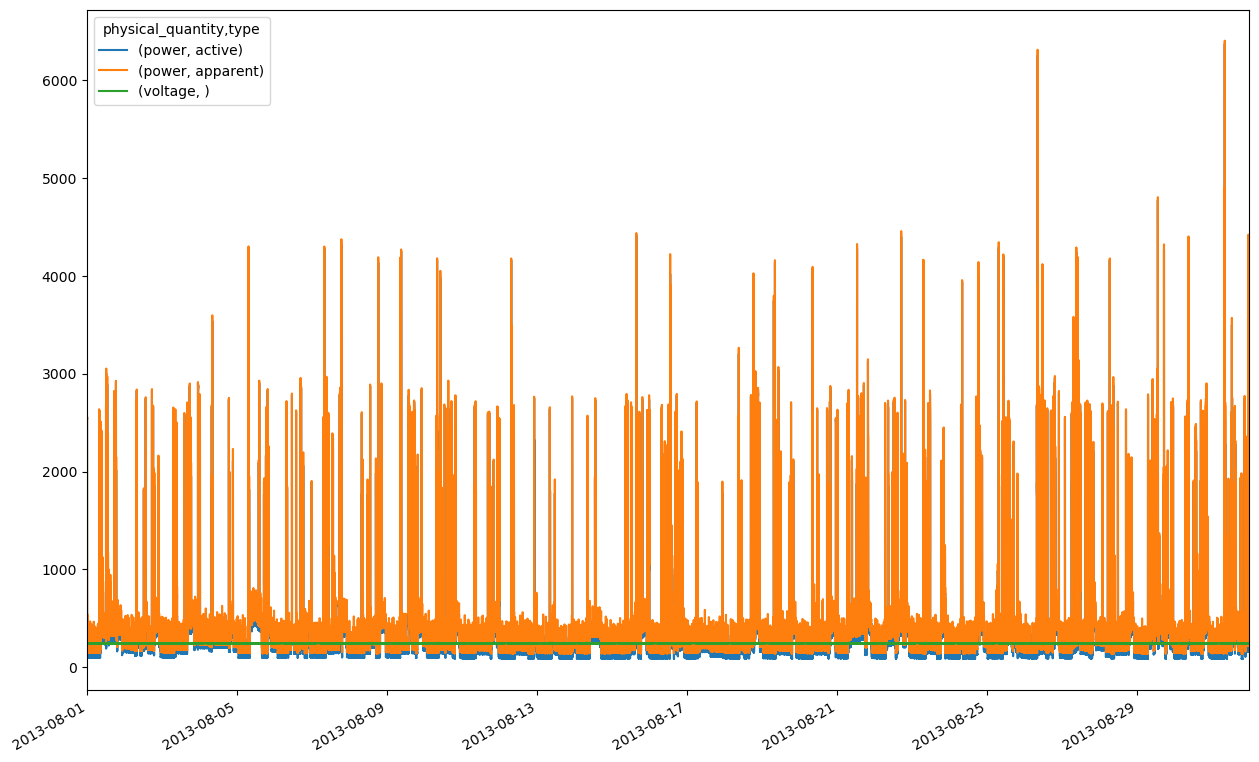

In [37]:
mains_df.plot()

In [38]:
mains_in_min_df = mains_df["2013-08-01"].resample('1min').sum() * 10

print(mains_in_min_df.shape)

mains_in_min_df.describe()

(1440, 3)


physical_quantity          power                      voltage
type                      active       apparent              
count                1440.000000    1440.000000   1440.000000
mean                36838.871094   42647.554688  24239.449219
std                 43545.023438   44154.839844    129.155212
min                  9404.366211   14396.733398  23774.117188
25%                 18398.157715   21546.062988  24151.482910
50%                 27373.458984   32444.541992  24255.485352
75%                 37765.875977   42536.790039  24337.908691
max                275245.687500  276983.437500  24637.783203

In [39]:
mains_in_min_df.head(24)

physical_quantity                  power                      voltage
type                              active       apparent              
2013-08-01 00:00:00+01:00  253165.953125  254434.468750  24249.117188
2013-08-01 00:01:00+01:00  253367.468750  254540.546875  24241.367188
2013-08-01 00:02:00+01:00  253464.140625  254613.500000  24250.152344
2013-08-01 00:03:00+01:00  253598.890625  254746.796875  24262.267578
2013-08-01 00:04:00+01:00  253853.515625  255000.765625  24280.148438
2013-08-01 00:05:00+01:00  209018.156250  211180.609375  24309.234375
2013-08-01 00:06:00+01:00   17364.099609   20699.000000  24415.566406
2013-08-01 00:07:00+01:00   11356.033203   16081.083984  24387.183594
2013-08-01 00:08:00+01:00   12156.733398   16586.400391  24388.785156
2013-08-01 00:09:00+01:00   10569.399414   15653.666992  24381.650391
2013-08-01 00:10:00+01:00   10209.132812   15430.883789  24404.933594
2013-08-01 00:11:00+01:00   10190.983398   15394.399414  24399.050781
2013-08-01 00:12:00+01:00   10058.233398   15303.849609  24315.849609
2013-08-01 00:13:00+01:00    9923.250000   15198.916992  24334.533203
2013-08-01 00:14:00+01:00    9894.416016   15146.333008  24363.667969
2013-08-01 00:15:00+01:00    9892.632812   15165.649414  24372.283203
2013-08-01 00:16:00+01:00    9889.417969   15169.947266  24399.650391
2013-08-01 00:17:00+01:00    9881.150391   15176.267578  24411.384766
2013-08-01 00:18:00+01:00    9872.516602   15139.233398  24368.066406
2013-08-01 00:19:00+01:00    9849.750000   15156.083984  24318.701172
2013-08-01 00:20:00+01:00    9841.416992   15131.483398  24318.048828
2013-08-01 00:21:00+01:00    9837.933594   15081.750000  24336.667969
2013-08-01 00:22:00+01:00    9829.416016   15084.033203  24338.400391
2013-08-01 00:23:00+01:00    9829.900391   15086.983398  24353.250000

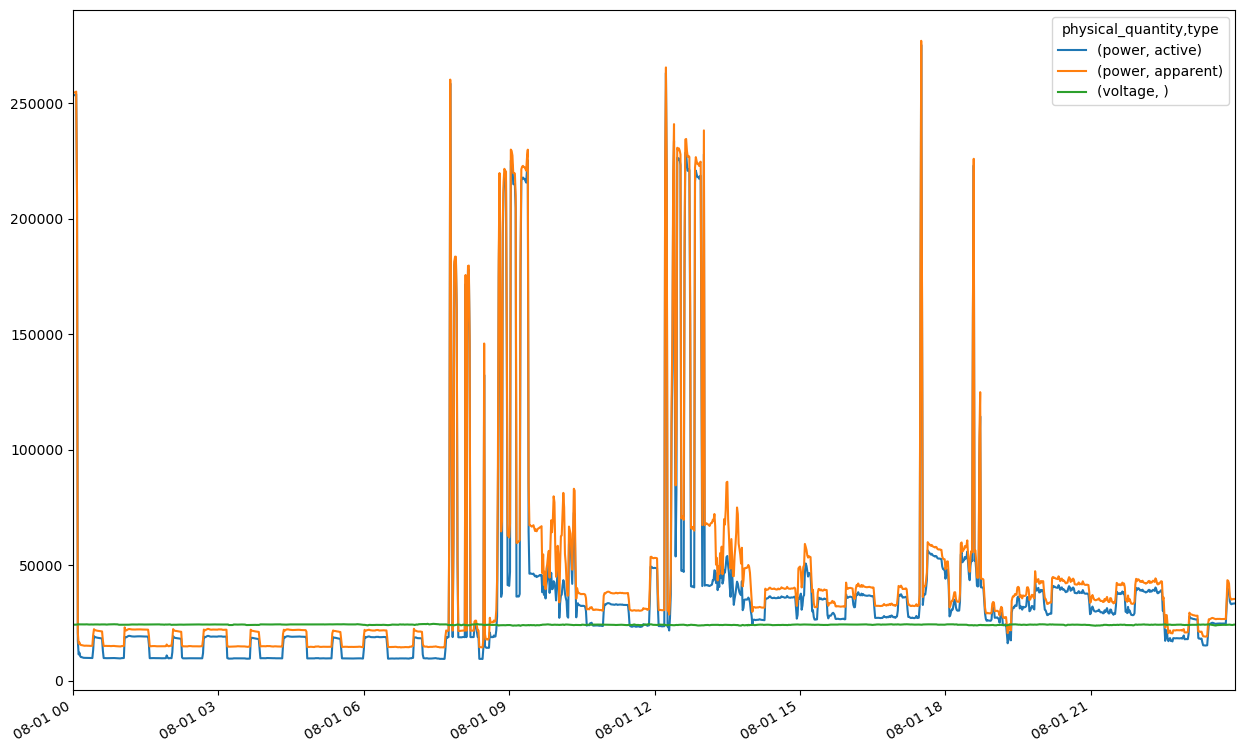

In [40]:
mains_in_min_df.plot()

In [41]:
mains_in_hour_df = mains_df["2013-08-01"].resample('60min').sum() * 10
mains_in_hour_df.head(24)

physical_quantity                 power                    voltage
type                             active      apparent             
2013-08-01 00:00:00+01:00  2.122627e+06  2.386351e+06  1461053.250
2013-08-01 01:00:00+01:00  8.749959e+05  1.119368e+06  1459288.625
2013-08-01 02:00:00+01:00  8.536159e+05  1.104306e+06  1458801.750
2013-08-01 03:00:00+01:00  7.821959e+05  1.045635e+06  1455792.625
2013-08-01 04:00:00+01:00  8.586924e+05  1.100892e+06  1461656.125
2013-08-01 05:00:00+01:00  6.780840e+05  9.565601e+05  1462489.500
2013-08-01 06:00:00+01:00  8.464463e+05  1.085873e+06  1452540.500
2013-08-01 07:00:00+01:00  2.064191e+06  2.306413e+06  1461330.625
2013-08-01 08:00:00+01:00  3.636732e+06  4.018515e+06  1450054.250
2013-08-01 09:00:00+01:00  5.519236e+06  6.380525e+06  1445393.000
2013-08-01 10:00:00+01:00  2.061678e+06  2.599460e+06  1453457.750
2013-08-01 11:00:00+01:00  1.825619e+06  2.172444e+06  1452533.125
2013-08-01 12:00:00+01:00  7.311706e+06  7.943179e+06  1447232.500
2013-08-01 13:00:00+01:00  2.763556e+06  3.801500e+06  1446066.875
2013-08-01 14:00:00+01:00  1.973457e+06  2.258404e+06  1451308.625
2013-08-01 15:00:00+01:00  1.986244e+06  2.352707e+06  1456028.750
2013-08-01 16:00:00+01:00  1.938543e+06  2.203458e+06  1458937.375
2013-08-01 17:00:00+01:00  2.896460e+06  3.148132e+06  1460121.250
2013-08-01 18:00:00+01:00  2.804664e+06  3.038404e+06  1450519.750
2013-08-01 19:00:00+01:00  1.838353e+06  2.081789e+06  1453489.500
2013-08-01 20:00:00+01:00  2.240624e+06  2.482688e+06  1454273.625
2013-08-01 21:00:00+01:00  1.927340e+06  2.207391e+06  1445712.000
2013-08-01 22:00:00+01:00  1.727968e+06  1.958618e+06  1454541.000
2013-08-01 23:00:00+01:00  1.514946e+06  1.659864e+06  1452185.125

Text(0, 0.5, 'Total Watt')

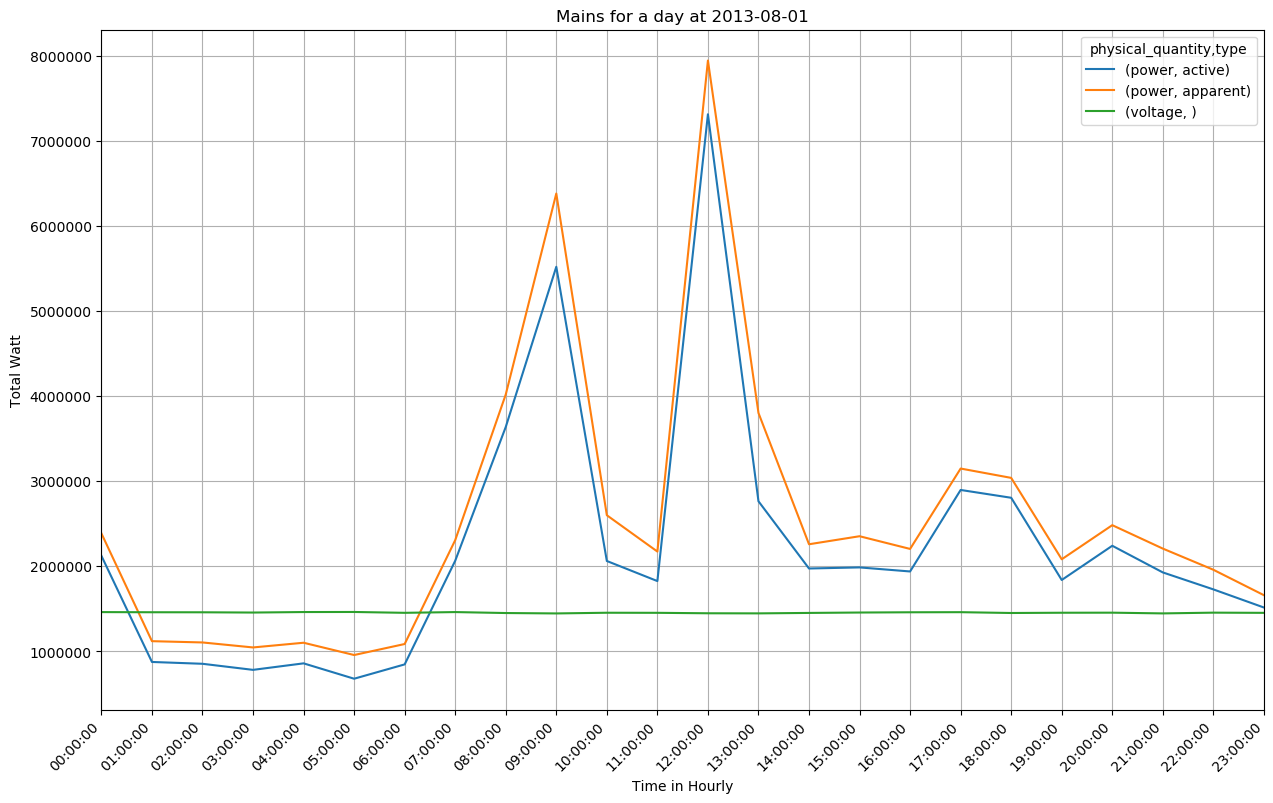

In [42]:
mytitle = "Mains for a day at 2013-08-01"

ax = mains_in_hour_df.plot(title=mytitle,
                        xticks=mains_in_hour_df.index, 
                        grid=True)

# Settle x-axes label 
mains_in_hour_df["TS"] = mains_in_hour_df.index.strftime('%H:%M:%S')
ax.set_xticklabels(mains_in_hour_df.TS, rotation=45)

ax.set_xlabel('Time in Hourly')
ax.set_ylabel('Total Watt')

## Work on "Submeters"

This section initializes and create a Submeter ElecMeter object from nilmtk.metergroup.MeterGroup

In [43]:
# Create a 'submeter' variable return MetaGroup object
submeters = house_data.submeters()

print("Data Type of submeters is {}.".format(type(submeters)))
print("Properties submeters of available_ac_types is {}.\n".format(submeters.available_ac_types('power')))

Data Type of submeters is <class 'nilmtk.metergroup.MeterGroup'>.
Properties submeters of available_ac_types is ['apparent', 'active'].



### Show the MetaGroup's of submeters content

In [44]:
submeters

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1), Appliance(type='washer dryer', instance=2)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances

### Select an appliance from ElecMeter in MetaGroup - Washer Dryer 

In [45]:
submeter_washer_dryer = house_data.select_using_appliances(type='washer dryer')

print(type(submeter_washer_dryer))
submeter_washer_dryer

<class 'nilmtk.metergroup.MeterGroup'>


MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1), Appliance(type='washer dryer', instance=2)])
)

In [46]:
submeter_washer_dryer_df = submeter_washer_dryer.dataframe_of_meters()
submeter_washer_dryer_df.describe()

,"(5, 1, UK-DALE)"
count,446400.000000
mean,18.094156
std,153.686737
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3855.000000


In [47]:
df_wd = next(house_data['washer dryer'].load())
df_wd.describe()

physical_quantity,power
type,active
count,374292.000000
mean,18.846151
std,157.617218
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3855.000000


### Select Top (more than one) Meters form submeters in MeterGroup

Only select the top K meters, according to energy.  Functions on the entire MeterGroup.  So if you mean to select the top K from only the submeters.  Default is k is 5.

In [48]:
# Select top 5 objects from MeterGroup, return MeterGroup object 
mg_top = house_data.submeters().select_top_k(k=5)

print("\n\nData Type of mg_top is {}.".format(type(mg_top))) 

# Show the selected MeterGroup values
mg_top

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

Data Type of mg_top is <class 'nilmtk.metergroup.MeterGroup'>.


MeterGroup(meters=
  ElecMeter(instance=12, building=1, dataset='UK-DALE', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1), Appliance(type='washer dryer', instance=2)])
  ElecMeter(instance=10, building=1, dataset='UK-DALE', appliances=[Appliance(type='kettle', instance=1), Appliance(type='food processor', instance=1), Appliance(type='toasted sandwich maker', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
)

In [49]:
# Load data to dataframe from MeterGroup
mg_top_df = mg_top.dataframe_of_meters()

print("Is there any null value in dataframe = {}.\n".format(mg_top_df.isnull().values.any()))

# Change readable column name
mg_top_df.columns = house_data.get_labels(mg_top_df.columns)

# Show dataframe info for MeterGroup
mg_top_df.describe()

Is there any null value in dataframe = False.



,Fridge freezer,Washer dryer,Kettle,Dish washer,Solar thermal pumping station
count,446400.000000,446400.000000,446400.000000,446400.000000,446400.000000
mean,46.796303,18.094156,15.933287,15.903139,15.699598
std,56.049191,153.686737,186.424744,173.946594,22.461956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000
75%,92.000000,0.000000,1.000000,1.000000,46.000000
max,1861.000000,3855.000000,2740.000000,2778.000000,61.000000


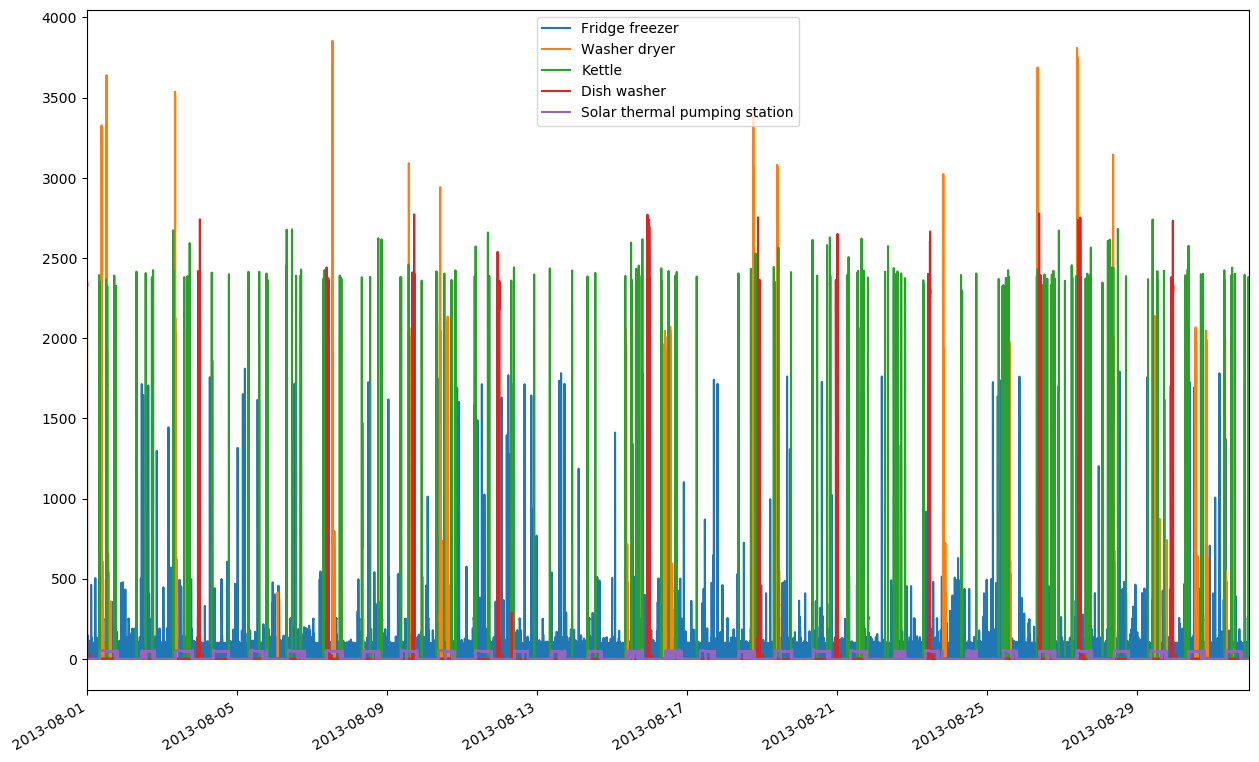

In [50]:
mg_top_df.plot()

### Access an ElecMeter Object From MeterGroup object

In [51]:
mgitem = mg_top.__getitem__(12)

print("Data Type of mgitem {}.".format(type(mgitem)))

print(mgitem.appliances)

print(mgitem.appliances[0])

print("\n")
print("Data Type of mgitem.appliances[0] {}.".format(type(mgitem.appliances[0])))
b = mgitem.appliances[0]
print(b.identifier)
print(b.n_meters)
print("\n")

print("\n")
print("Data Type of b.metadata {}.".format(type(b.metadata)))
print(b.metadata)
print(b.metadata.get("type"))
print(b.metadata.get("instance"))
print("\n")

print(b.categories)

Data Type of mgitem <class 'nilmtk.elecmeter.ElecMeter'>.
[Appliance(type='fridge freezer', instance=1)]
Appliance(type='fridge freezer', instance=1)


Data Type of mgitem.appliances[0] <class 'nilmtk.appliance.Appliance'>.
ApplianceID(type='fridge freezer', instance=1)
1




Data Type of b.metadata <class 'dict'>.
{'instance': 1, 'max_power': 300, 'meters': [12], 'min_off_duration': 12, 'min_on_duration': 60, 'on_power_threshold': 50, 'original_name': 'fridge', 'room': 'kitchen', 'subtype': 'fridge on top', 'type': 'fridge freezer', 'year_of_purchase': 2010, 'dataset': 'UK-DALE', 'building': 1}
fridge freezer
1


<bound method Appliance.categories of Appliance(type='fridge freezer', instance=1)>


# Comparing Meters Data

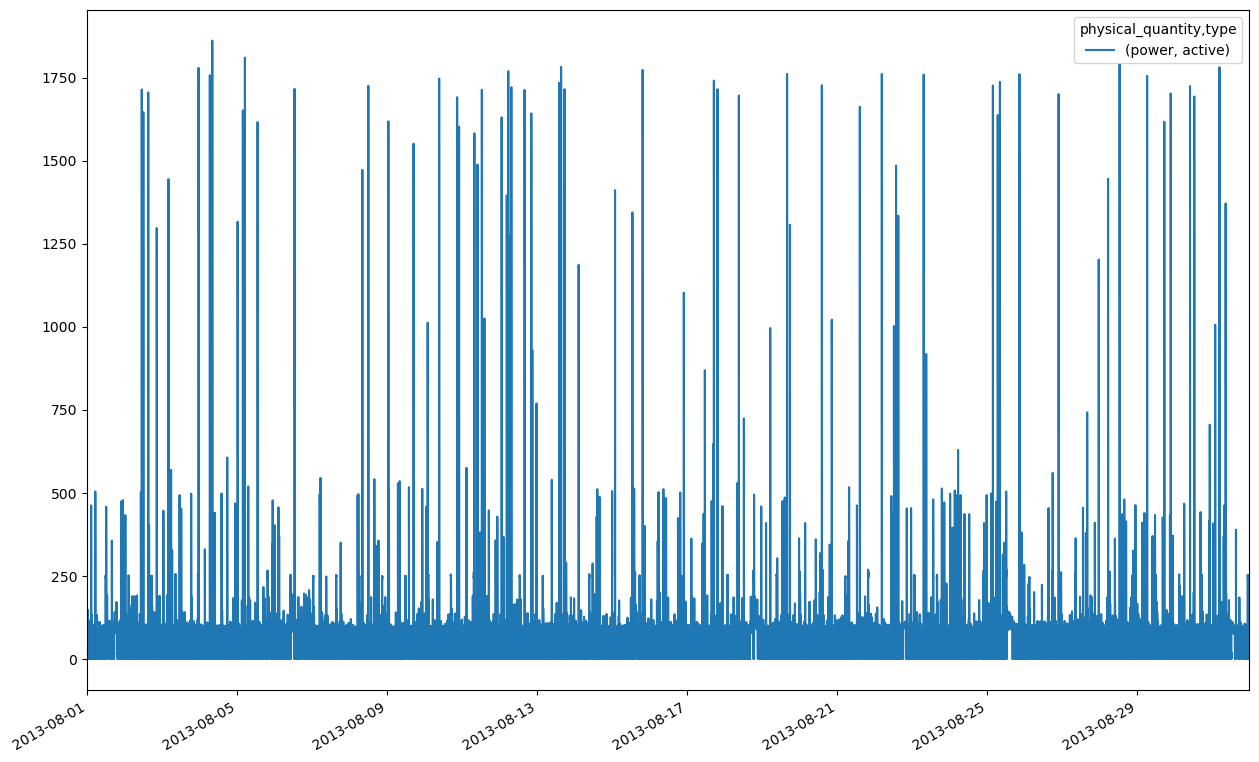

In [52]:
df_ff = next(house_data['fridge freezer'].load())
df_ff.plot()

In [53]:
df_ff.describe()

physical_quantity,power
type,active
count,369660.000000
mean,46.803059
std,55.805698
min,0.000000
25%,0.000000
50%,0.000000
75%,92.000000
max,1861.000000


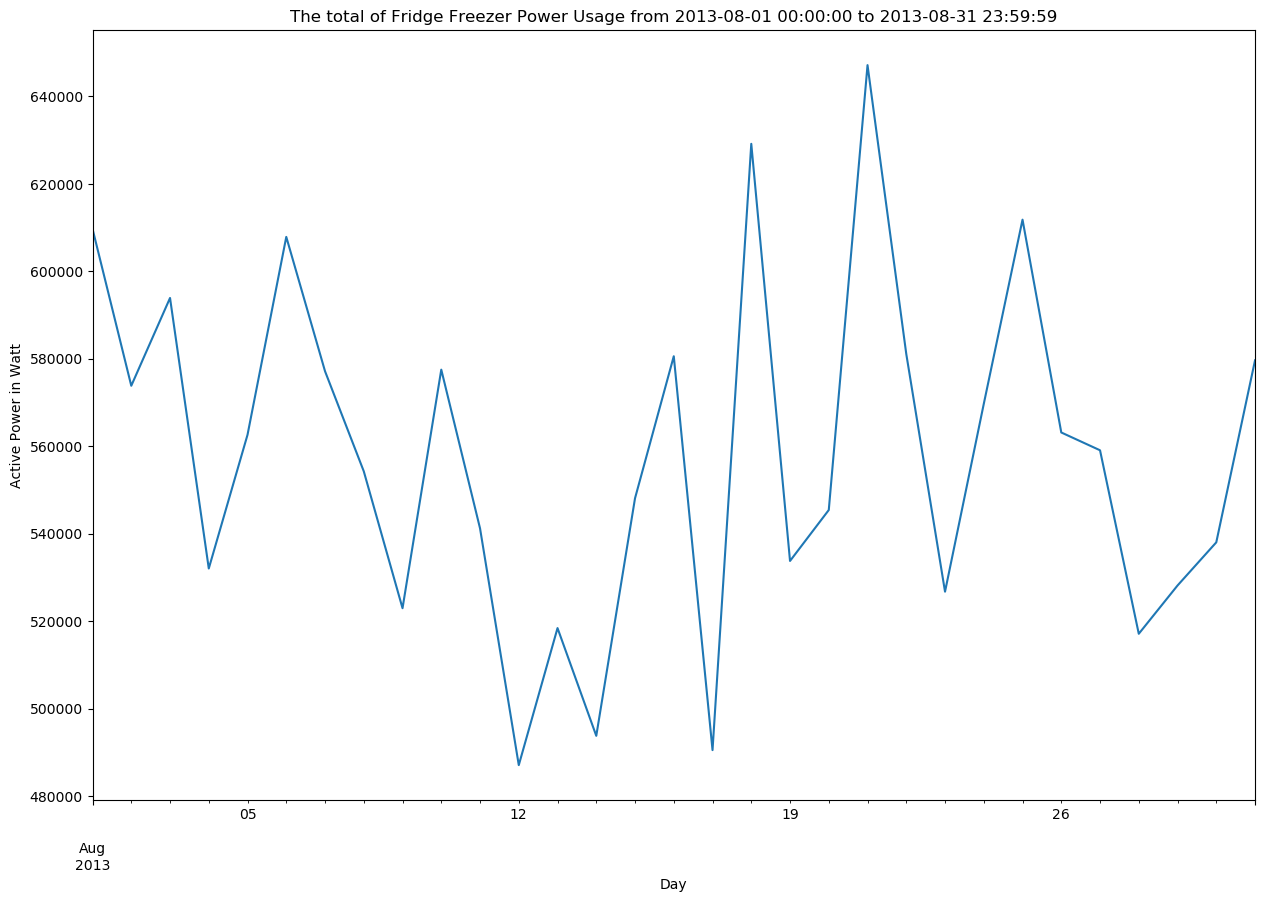

In [54]:
mytitle = "The total of Fridge Freezer Power Usage from " + START_TS + " to " + END_TS
myx_label = "Day"
myy_label = "Active Power in Watt"

df_ff[('power', 'active')].resample('D').sum().plot(title=mytitle)
plt.xlabel(myx_label)
plt.ylabel(myy_label)
plt.show()

In [55]:
sr_daily_ff = df_ff[('power', 'active')].resample('D').sum()

sr_daily_ff.index = sr_daily_ff.index.strftime('%Y-%m-%d').tolist()

sr_daily_ff

2013-08-01    609708.0
2013-08-02    573823.0
2013-08-03    593904.0
2013-08-04    532024.0
2013-08-05    562614.0
2013-08-06    607873.0
2013-08-07    577144.0
2013-08-08    554255.0
2013-08-09    522940.0
2013-08-10    577509.0
2013-08-11    541211.0
2013-08-12    487051.0
2013-08-13    518396.0
2013-08-14    493752.0
2013-08-15    548093.0
2013-08-16    580579.0
2013-08-17    490483.0
2013-08-18    629162.0
2013-08-19    533751.0
2013-08-20    545405.0
2013-08-21    647162.0
2013-08-22    581089.0
2013-08-23    526720.0
2013-08-24    569677.0
2013-08-25    611814.0
2013-08-26    563137.0
2013-08-27    559066.0
2013-08-28    517093.0
2013-08-29    528137.0
2013-08-30    538007.0
2013-08-31    579638.0
Name: (power, active), dtype: float32

## Analysis of Main Vs Dish Washer for Daily

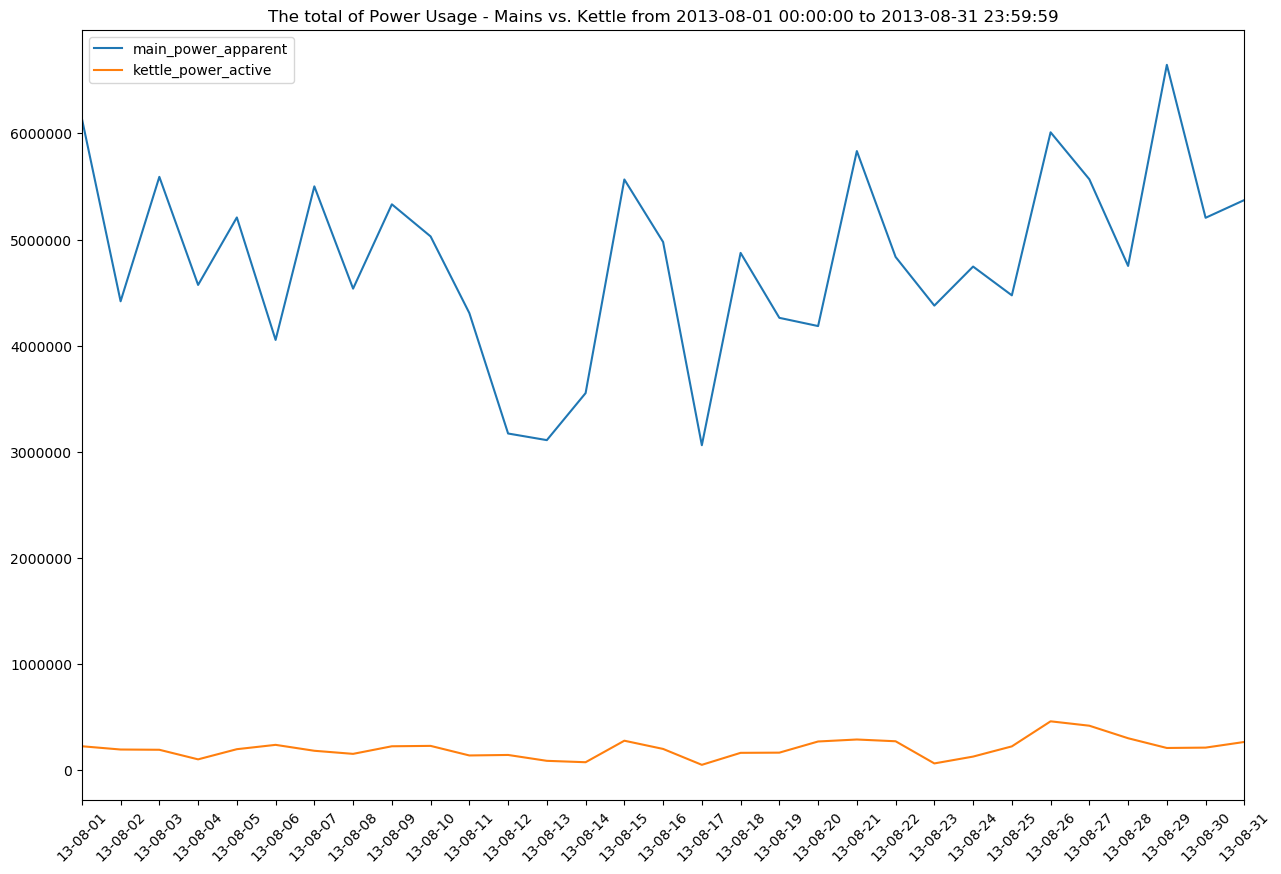

In [56]:
# Combine two series for the daily of main and washing machine to a dataframe

# Get series of washing machine
df_ke = next(house_data['kettle'].load())
sr_of_ke = df_ke[('power', 'active')].resample('D').sum()

# Get series of main
df_of_mains = next(mains.load(sample_period=6))
sr_of_mains = df_of_mains[('power', 'apparent')].resample('D').sum()

# Merging two series into a dataframe
mains_ke_df=pd.concat([sr_of_mains,sr_of_ke],axis=1)

# Changing Columns Name and flatten MultiIndex Columns
mains_ke_df.columns = ["_".join(pair) for pair in mains_ke_df.columns]
mains_ke_df.columns = ['main_power_apparent', 'kettle_power_active']

# Generate Chart

mytitle = "The total of Power Usage - Mains vs. Kettle from " + START_TS + " to " + END_TS
myx_label = "Day"
myy_label = "Active Power in Watt"

ax = mains_ke_df.plot(title=mytitle)
ax.set_xticks(mains_ke_df.index)
mains_ke_df["TS"] = mains_ke_df.index.strftime('%y-%m-%d')
ax.set_xticklabels(mains_ke_df.TS, rotation=45)

plt.show()

In [57]:
mains_ke_df

,main_power_apparent,kettle_power_active,TS
2013-08-01 00:00:00+01:00,6141247.50,224988.0,13-08-01
2013-08-02 00:00:00+01:00,4417836.50,194145.0,13-08-02
2013-08-03 00:00:00+01:00,5590335.00,191778.0,13-08-03
2013-08-04 00:00:00+01:00,4571916.50,101433.0,13-08-04
2013-08-05 00:00:00+01:00,5207785.00,197245.0,13-08-05
2013-08-06 00:00:00+01:00,4053735.00,238064.0,13-08-06
2013-08-07 00:00:00+01:00,5500783.00,182326.0,13-08-07
2013-08-08 00:00:00+01:00,4537151.00,153205.0,13-08-08
2013-08-09 00:00:00+01:00,5331722.00,224744.0,13-08-09
2013-08-10 00:00:00+01:00,5029066.00,228395.0,13-08-10


## Analysis of Main Vs Kettle for Hourly

Max value of mains  = 794317.875 at 2013-08-01 12:00:00+01:00
Max value of kettle = 67023.0 at 2013-08-01 12:00:00+01:00


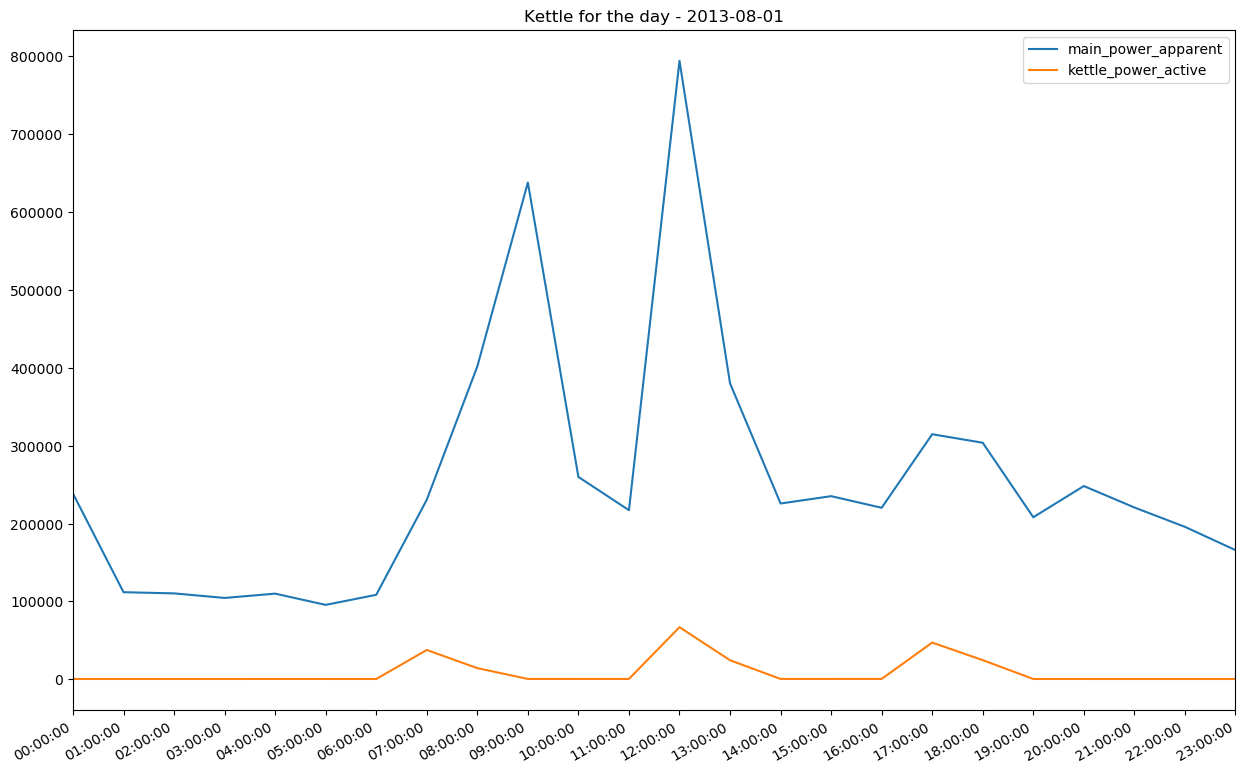

In [58]:
thedate = "2013-08-01"
mytitle = "Kettle for the day - " + thedate 

df_ke = next(house_data['kettle'].load())
df_of_mains = next(mains.load(sample_period=6))

sr_ke_daily = df_ke[('power', 'active')].resample('H').sum()
sr_mains_daily = df_of_mains[('power', 'apparent')].resample('H').sum()

sr_mains_theday = sr_mains_daily[thedate]
sr_ke_theday = sr_ke_daily[thedate]

print("Max value of mains  = {} at {}".format(sr_mains_theday.max(),
                                              sr_mains_theday.idxmax()))
print("Max value of kettle = {} at {}".format(sr_ke_theday.max(),
                                              sr_ke_theday.idxmax()))

# Merging two series into a dataframe
df_mains_ke_hourly = pd.concat([sr_mains_theday,sr_ke_theday],axis=1)

# Changing Columns Name and flatten MultiIndex Columns
df_mains_ke_hourly.columns = ["_".join(pair) for pair in df_mains_ke_hourly.columns]
df_mains_ke_hourly.columns = ['main_power_apparent', 'kettle_power_active']
df_mains_ke_hourly["TS"] = df_mains_ke_hourly.index.strftime('%H:%M:%S')

ax = df_mains_ke_hourly.plot(kind='line', title=mytitle)
ax.set_xticks(df_mains_ke_hourly.index)
ax.set_xticklabels(df_mains_ke_hourly.TS)

plt.show()

In [59]:
df_mains_ke_hourly

,main_power_apparent,kettle_power_active,TS
2013-08-01 00:00:00+01:00,238635.125000,494.0,00:00:00
2013-08-01 01:00:00+01:00,111936.820312,492.0,01:00:00
2013-08-01 02:00:00+01:00,110430.648438,497.0,02:00:00
2013-08-01 03:00:00+01:00,104563.468750,493.0,03:00:00
2013-08-01 04:00:00+01:00,110089.156250,503.0,04:00:00
2013-08-01 05:00:00+01:00,95656.015625,500.0,05:00:00
2013-08-01 06:00:00+01:00,108587.257812,502.0,06:00:00
2013-08-01 07:00:00+01:00,230641.265625,37732.0,07:00:00
2013-08-01 08:00:00+01:00,401851.500000,14425.0,08:00:00
2013-08-01 09:00:00+01:00,638052.500000,552.0,09:00:00


# Workout & Findings

After the completion this notebook, prepare a simple presentation slide to express your summary and new discovery information from here.

- May able to further analysis and compare the top 5 appliances
- May perform highlevel grouping monthly, daily and hourly to identify appliances usage pattern.  This may help to further download the high frequency raw data

## Analysis of Main Vs Top-5 appliances for Hourly

Max value of mains                     = 794317.875 at 2013-08-01 12:00:00+01:00
Max value of kettle                    = 67023.0    at 2013-08-01 12:00:00+01:00
Max value of food processor            = 67023.0    at 2013-08-01 12:00:00+01:00
Max value of dish washer               = 117843.0   at 2013-08-01 00:00:00+01:00
Max value of washer dryer              = 417077.0   at 2013-08-01 12:00:00+01:00
Max value of toasted sandwich maker    = 67023.0    at 2013-08-01 12:00:00+01:00
Max value of fridge freezer            = 47526.0    at 2013-08-01 18:00:00+01:00


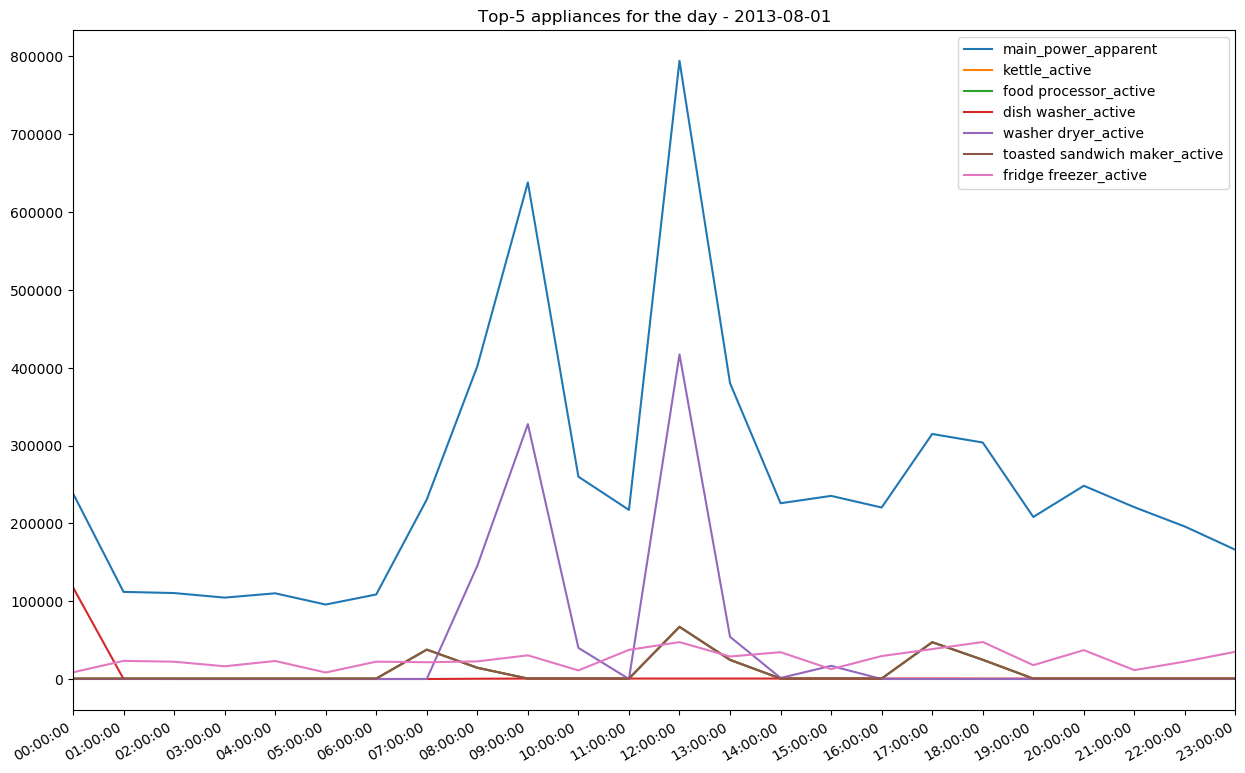

In [149]:
thedate = "2013-08-01"
mytitle = "Top-5 appliances for the day - " + thedate 

appliances_in_top5 = set([appliance.type['type'] for appliance in mg_top.appliances if 'active' in house_data[appliance.type['type']].available_power_ac_types()])

df_of_mains = next(mains.load(sample_period=6))
sr_mains_daily = df_of_mains[('power', 'apparent')].resample('H').sum()
sr_mains_theday = sr_mains_daily[thedate]
print("Max value of {:<25} = {:<10} at {}".format('mains', sr_mains_theday.max(),
                                              sr_mains_theday.idxmax()))
df_mains_ke_hourly = sr_mains_theday

for appliance in appliances_in_top5:
    df_temp        = next(house_data[appliance].load())
    sr_temp_daily  = df_temp[('power','active')].resample('H').sum()
    sr_temp_theday = sr_temp_daily[thedate]
    df_mains_ke_hourly = pd.concat([df_mains_ke_hourly, sr_temp_theday],axis=1)   # Merging series into a dataframe
    print("Max value of {:<25} = {:<10} at {}".format(appliance, sr_temp_theday.max(),
                                                          sr_temp_theday.idxmax()))

# Changing Columns Name and flatten MultiIndex Columns
df_mains_ke_hourly.columns = ["_".join(pair) for pair in df_mains_ke_hourly.columns]
df_mains_ke_hourly.columns = ['main_power_apparent'] + [f'{appliance}_active' for appliance in appliances_in_top5]
df_mains_ke_hourly["TS"] = df_mains_ke_hourly.index.strftime('%H:%M:%S')

ax = df_mains_ke_hourly.plot(kind='line', title=mytitle)
ax.set_xticks(df_mains_ke_hourly.index)
ax.set_xticklabels(df_mains_ke_hourly.TS)

plt.show()

In [141]:
df_mains_ke_hourly

,main_power_apparent,fridge freezer_active,washer dryer_active,kettle_active,food processor_active,dish washer_active,washer dryer_active,toasted sandwich maker_active,TS
2013-08-01 00:00:00+01:00,238635.125000,494.0,494.0,494.0,494.0,494.0,494.0,494.0,00:00:00
2013-08-01 01:00:00+01:00,111936.820312,492.0,492.0,492.0,492.0,492.0,492.0,492.0,01:00:00
2013-08-01 02:00:00+01:00,110430.648438,497.0,497.0,497.0,497.0,497.0,497.0,497.0,02:00:00
2013-08-01 03:00:00+01:00,104563.468750,493.0,493.0,493.0,493.0,493.0,493.0,493.0,03:00:00
2013-08-01 04:00:00+01:00,110089.156250,503.0,503.0,503.0,503.0,503.0,503.0,503.0,04:00:00
2013-08-01 05:00:00+01:00,95656.015625,500.0,500.0,500.0,500.0,500.0,500.0,500.0,05:00:00
2013-08-01 06:00:00+01:00,108587.257812,502.0,502.0,502.0,502.0,502.0,502.0,502.0,06:00:00
2013-08-01 07:00:00+01:00,230641.265625,37732.0,37732.0,37732.0,37732.0,37732.0,37732.0,37732.0,07:00:00
2013-08-01 08:00:00+01:00,401851.500000,14425.0,14425.0,14425.0,14425.0,14425.0,14425.0,14425.0,08:00:00
2013-08-01 09:00:00+01:00,638052.500000,552.0,552.0,552.0,552.0,552.0,552.0,552.0,09:00:00
